In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from qvalue import qvalue

The goal of this simple script is to implement the calculation of q-values as described in:

Storey, John D., and Robert Tibshirani. 2003. “Statistical Significance for Genomewide Studies.” Proceedings of the National Academy of Sciences of the United States of America 100 (16): 9440–45.

The reference implementation is the "qvalue" R package.

http://www.bioconductor.org/packages/release/bioc/html/qvalue.html

To ensure that our implementation gives similar results to this package, we used the dataset mentioned in the publication (R data hedenfalk) and compare the obtained q-values.

In [2]:
df = pd.read_csv("hedenfalk_R_results.csv.gz")
df

,hedenfalk_ps,hedenfalk_qs
0,0.012126,0.088192
1,0.075025,0.209367
2,0.994921,0.667999
3,0.041785,0.161636
4,0.845814,0.632474
...,...,...
3165,0.052492,0.178934
3166,0.337413,0.423267
3167,0.539972,0.523692
3168,0.254675,0.372226


In [3]:
df["py_qs"] = qvalue(df["hedenfalk_ps"].values)

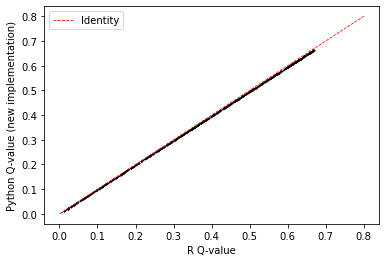

In [23]:
plt.scatter(df["hedenfalk_qs"], df["py_qs"], s=0.1, color="black")
plt.plot([0, 0.8], [0, 0.8], label="Identity", lw=0.8, ls="--", c="red")

plt.xlabel("R Q-value")
plt.ylabel("Python Q-value (new implementation)")
plt.legend()

In [10]:
(df["py_qs"] - df["hedenfalk_qs"]).describe()

count    3170.000000
mean       -0.003426
std         0.001727
min        -0.005943
25%        -0.005003
50%        -0.003562
75%        -0.002009
max        -0.000059
dtype: float64

The source of the difference is likely to be in the spline implementation that is different between R and Python. This results in slightly different estimate for pi_0 when lambda=1.